In [1]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('red-wine.csv')


In [2]:
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [3]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)


In [4]:
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']
print(X_train.shape)


(1119, 11)


In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(optimizer='sgd', loss='mse')

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100
)


Epoch 1/100
5/5 [==============================] - 1s 51ms/step - loss: 0.2549 - val_loss: 0.1809
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1426 - val_loss: 0.1079
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0856 - val_loss: 0.0698
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0560 - val_loss: 0.0489
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0402 - val_loss: 0.0380
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0322 - val_loss: 0.0325
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0284 - val_loss: 0.0295
Epoch 8/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0263 - val_loss: 0.0279
Epoch 9/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0254 - val_loss: 0.0270
Epoch 10/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0248 - val_loss: 0.0264
Epoch 11/100
5/5 [=

Epoch 84/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0204 - val_loss: 0.0206
Epoch 85/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0203 - val_loss: 0.0205
Epoch 86/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0203 - val_loss: 0.0205
Epoch 87/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0203 - val_loss: 0.0204
Epoch 88/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0202 - val_loss: 0.0204
Epoch 89/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0202 - val_loss: 0.0204
Epoch 90/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0202 - val_loss: 0.0203
Epoch 91/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0202 - val_loss: 0.0203
Epoch 92/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0201 - val_loss: 0.0202
Epoch 93/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0201 - val_loss: 0.0202
Epoch 94/1

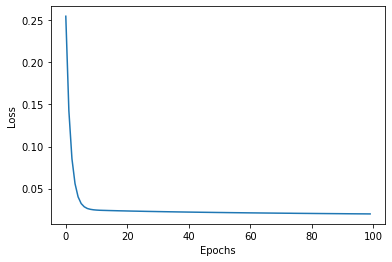

In [6]:
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
history_df['loss'].plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
